In [6]:
import mingus.extra.lilypond as LilyPond
from mingus.containers import Bar


In [10]:
b = Bar()
b + "C"
b + "E"
b + "G"
b + "B"
bar = LilyPond.from_Bar(b)
# LilyPond.to_png(bar, "my_first_bar")
!python ly -fpng -o bar "my_first_bar"

python: can't open file 'ly': [Errno 2] No such file or directory


In [13]:
import mido
mid = mido.MidiFile('output.mid')

In [14]:
mid.tracks


[<midi track '' 3 messages>, <midi track '' 50 messages>]

In [15]:
def msg2dict(msg):
    result = dict()
    if 'note_on' in msg:
        on_ = True
    elif 'note_off' in msg:
        on_ = False
    else:
        on_ = None
    result['time'] = int(msg[msg.rfind('time'):].split(' ')[0].split('=')[1].translate(
        str.maketrans({a: None for a in string.punctuation})))

    if on_ is not None:
        for k in ['note', 'velocity']:
            result[k] = int(msg[msg.rfind(k):].split(' ')[0].split('=')[1].translate(
                str.maketrans({a: None for a in string.punctuation})))
    return [result, on_]

In [16]:
def switch_note(last_state, note, velocity, on_=True):
    # piano has 88 notes, corresponding to note id 21 to 108, any note out of this range will be ignored
    result = [0] * 88 if last_state is None else last_state.copy()
    if 21 <= note <= 108:
        result[note-21] = velocity if on_ else 0
    return result

In [17]:
def get_new_state(new_msg, last_state):
    new_msg, on_ = msg2dict(str(new_msg))
    new_state = switch_note(last_state, note=new_msg['note'], velocity=new_msg['velocity'], on_=on_) if on_ is not None else last_state
    return [new_state, new_msg['time']]
def track2seq(track):
    # piano has 88 notes, corresponding to note id 21 to 108, any note out of the id range will be ignored
    result = []
    last_state, last_time = get_new_state(str(track[0]), [0]*88)
    for i in range(1, len(track)):
        new_state, new_time = get_new_state(track[i], last_state)
        if new_time > 0:
            result += [last_state]*new_time
        last_state, last_time = new_state, new_time
    return result

In [18]:
def mid2arry(mid, min_msg_pct=0.1):
    tracks_len = [len(tr) for tr in mid.tracks]
    min_n_msg = max(tracks_len) * min_msg_pct
    # convert each track to nested list
    all_arys = []
    for i in range(len(mid.tracks)):
        if len(mid.tracks[i]) > min_n_msg:
            ary_i = track2seq(mid.tracks[i])
            all_arys.append(ary_i)
    # make all nested list the same length
    max_len = max([len(ary) for ary in all_arys])
    for i in range(len(all_arys)):
        if len(all_arys[i]) < max_len:
            all_arys[i] += [[0] * 88] * (max_len - len(all_arys[i]))
    all_arys = np.array(all_arys)
    all_arys = all_arys.max(axis=0)
    # trim: remove consecutive 0s in the beginning and at the end
    sums = all_arys.sum(axis=1)
    ends = np.where(sums > 0)[0]
    return all_arys[min(ends): max(ends)]

In [19]:
result_array = mid2arry(mid)
import matplotlib.pyplot as plt
plt.plot(range(result_array.shape[0]), np.multiply(np.where(result_array>0, 1, 0), range(1, 89)), marker='.', markersize=1, linestyle='')
plt.title("nocturne_27_2_(c)inoue.mid")
plt.show()

NameError: name 'string' is not defined

In [20]:
import pypianoroll
multitrack = pypianoroll.read("output.mid")


<Figure size 800x400 with 0 Axes>

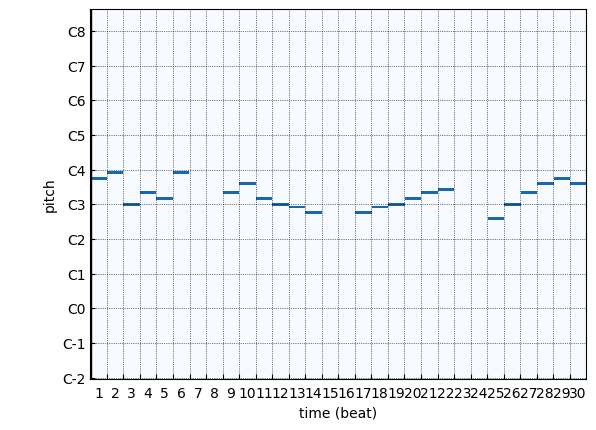

In [50]:
plt.figure(figsize=(8,4))
multitrack.plot()
plt.savefig("what.png")

[<AxesSubplot:xlabel='time (beat)', ylabel='\n\npitch'>]

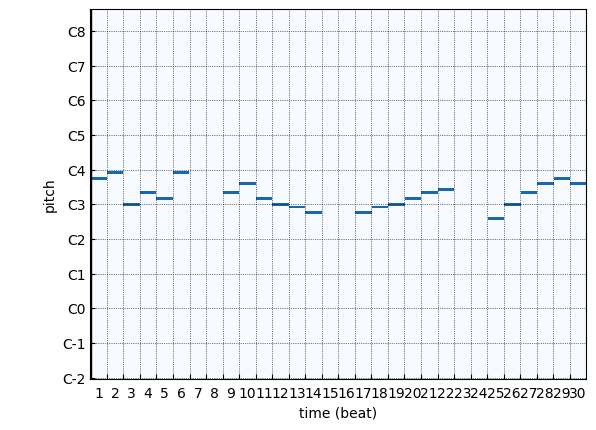

AttributeError: 'list' object has no attribute 'write'

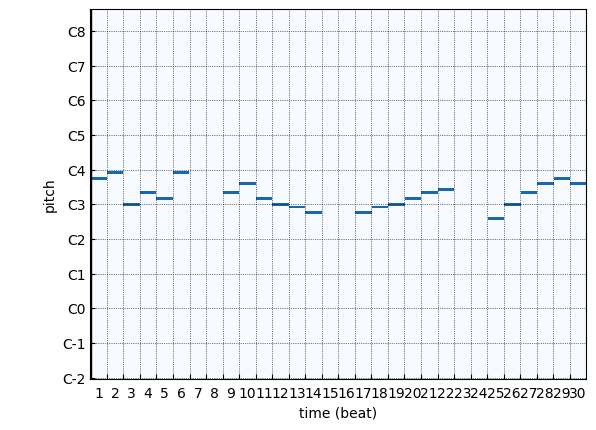

In [24]:
import matplotlib.pyplot as plt
plt.savefig(multitrack.plot())


In [31]:
import numpy as np

In [26]:
import pretty_midi

In [27]:
midi_data = pretty_midi.PrettyMIDI('output.mid')

In [45]:
import plotter
plotter = Plotter()
plotter.show(midi_data, "/tmp/example-01.html")

ModuleNotFoundError: No module named 'tikzplotlib'

In [29]:
hhhh = midi_data.get_piano_roll()

In [32]:
np.shape(hhhh)

(128, 1600)

In [36]:
import librosa
import librosa.display


TypeError: __init__() got an unexpected keyword argument 'basey'

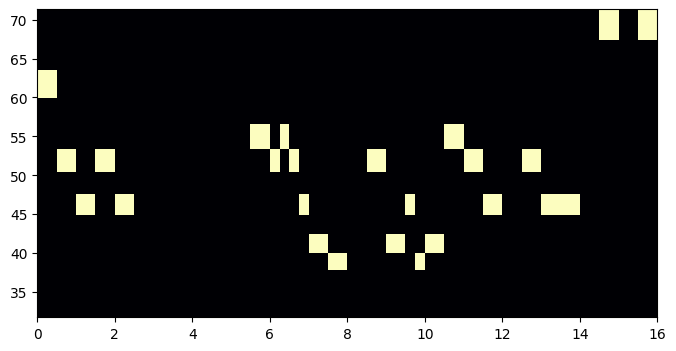

In [47]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(hhhh[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note')

plt.figure(figsize=(8, 4))
plot_piano_roll(midi_data, 56, 70)
plt.savefig("alll.png")

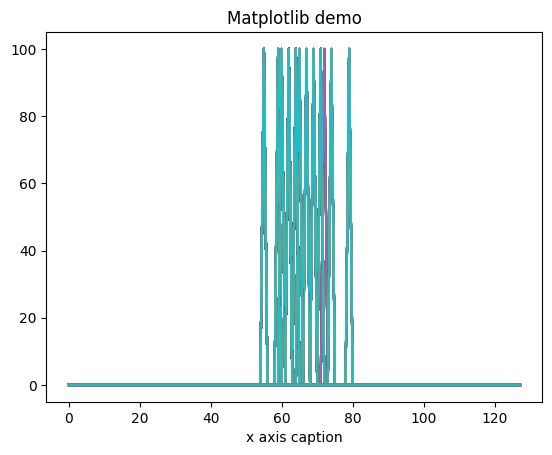

In [40]:
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.plot(hhhh) 
plt.show()

In [43]:
5+5

10

In [ ]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm[start_pitch:end_pitch])

plt.figure(figsize=(8, 4))
plot_piano_roll(midi_data, 56, 70)
